In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def es_valido(estado):
    granjero, lobo, cabra, col = estado
    if (lobo == cabra and granjero != lobo):
        return False
    if (cabra == col and granjero != cabra):
        return False
    return True

In [ ]:
def generar_grafo():
    G = nx.DiGraph()
    estados = [(a, b, c, d) for a in [0,1] for b in [0,1] for c in [0,1] for d in [0,1]]
    
    for estado in estados:
        if es_valido(estado):
            for i in range(4):
                if estado[0] == estado[i]:  # El granjero puede llevar al lobo, cabra o col
                    siguiente = list(estado)
                    siguiente[0] = 1 - siguiente[0]
                    if i != 0:
                        siguiente[i] = 1 - siguiente[i]
                    siguiente = tuple(siguiente)
                    if es_valido(siguiente):
                        G.add_edge(estado, siguiente)
    return G

In [5]:
G = generar_grafo()

In [6]:
inicio = (0, 0, 0, 0)
fin = (1, 1, 1, 1)
camino = nx.shortest_path(G, source=inicio, target=fin)

In [12]:
print("Secuencia de movimientos:")
for paso in camino:
    print(paso)

Secuencia de movimientos:
(0, 0, 0, 0)
(1, 0, 1, 0)
(0, 0, 1, 0)
(1, 1, 1, 0)
(0, 1, 0, 0)
(1, 1, 0, 1)
(0, 1, 0, 1)
(1, 1, 1, 1)


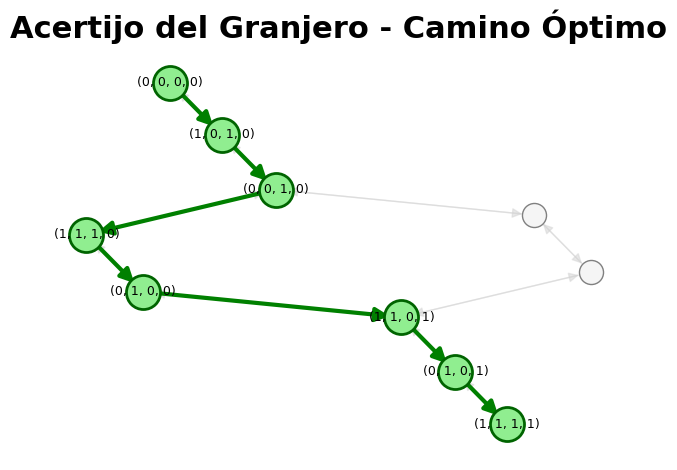

: 

In [ ]:
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_edges(G, pos, edge_color='lightgray', arrowsize=15, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='whitesmoke', edgecolors='gray', linewidths=1)

path_edges = list(zip(camino, camino[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=camino, node_color='#90EE90', node_size=600, edgecolors='darkgreen', linewidths=2)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3, arrowsize=20)


labels = {node: f"{node}" for node in camino}
nx.draw_networkx_labels(G, pos, labels, font_size=9, font_color='black')

plt.title("Acertijo del Granjero - Camino Óptimo", fontsize=22, fontweight='bold')
plt.gca().set_facecolor('white')
plt.axis('off')
plt.tight_layout()
plt.show()